Gabriel Marcelino, Grant Burk, and Eli Kaustinen <br>
November 2024 <br>
GAN-Based Application <br>

## Problem Statement


The purpose of this project is to design a GAN-based application using Keras and TensorFlow that can generate fake images that look like real ones. The main idea is to train a GAN with a mix of real and fake images so it can learn to distinguish (discriminate) between them.


## Import Required Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Reshape, Dropout, Dense 
from tensorflow.keras.layers import Flatten, BatchNormalization
from tensorflow.keras.layers import Activation, ZeroPadding2D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
from tqdm import tqdm
import os 
import time
import matplotlib.pyplot as plt


## Preprocess data

In [2]:
# Load MNIST dataset
def preprocess_mnist_data():
    (x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
    x_train = x_train / 127.5 - 1
    x_train = np.expand_dims(x_train, axis=-1)
    return x_train


x_tr = preprocess_mnist_data()


## Build Generator

In [3]:
def build_generator(input_dimension, output_dimension):
    gen = Sequential([
        Dense(256, input_dim=input_dimension),
        LeakyReLU(0.2),
        Dense(512),
        LeakyReLU(0.2),
        Dense(1024),
        LeakyReLU(0.2),
        Dense(output_dimension, activation='tanh'),
        Reshape((28, 28, 1))
    ])
    return gen


## Build Discriminator

In [4]:
def build_discriminator(input_dimension):
    desc = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(1024),
        LeakyReLU(0.2),
        Dropout(0.2),
        Dense(512),
        LeakyReLU(0.2),
        Dropout(0.2),
        Dense(256),
        LeakyReLU(0.2),
        Dense(1, activation='sigmoid')
    ])
    return desc


## Build GAN (Stack Generator and Discriminator)

In [5]:
def build_gan(generator, discriminator, input_dimension):
    discriminator.trainable = False
    gan_input = Input(shape=(input_dimension,))
    gen_output = generator(gan_input)
    gan_output = discriminator(gen_output)
    gan = Model(inputs=gan_input, outputs=gan_output)
    return gan


## Train GAN

In [6]:
def generate_noise(batch_size, input_dimension):
    return np.random.normal(0, 1, (batch_size, input_dimension))

def train_gan(generator, discriminator, gan, x_train, input_dimension, batch_size, discriminator_updates=2):
    noise = generate_noise(batch_size, input_dimension)
    generated_images = generator.predict(noise, verbose=0)

    # Sample real images
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_images = x_train[idx]

    # Combine real and fake images
    X = np.concatenate([real_images, generated_images])

    # Labels for real and fake images
    y_discriminator = np.concatenate([np.ones(batch_size) * 0.9, np.zeros(batch_size)])

    # Train discriminator multiple times
    discriminator_loss = 0
    for _ in range(discriminator_updates):
        # Train discriminator
        discriminator.trainable = True
        d_loss = discriminator.train_on_batch(X, y_discriminator)
        discriminator_loss += d_loss[0]  # Assuming d_loss is a list, use the first element (loss value)


    # Train generator
    noise = generate_noise(batch_size, input_dimension)
    y_generator = np.ones(batch_size)
    discriminator.trainable = False
    g_loss = gan.train_on_batch(noise, y_generator)

    # Return scalar values instead of lists
    if isinstance(d_loss, list):
        d_loss = d_loss[0]  # Get the loss value, ignoring metrics
    if isinstance(g_loss, list):
        g_loss = g_loss[0]  # Get the loss value, ignoring metrics

    return d_loss, g_loss


## Function to plot generated images to track progress

In [7]:
def plot_generated_images(epoch, generator, input_dimension, examples=10, dim=(1, 10), figsize=(10, 1)):
    noise = generate_noise(examples, input_dimension)
    generated_images = generator.predict(noise, verbose=0)
    generated_images = (generated_images + 1) / 2  # Rescale to [0,1]
    
    plt.figure(figsize=figsize)
    for i in range(examples):
        plt.subplot(dim[0], dim[1], i + 1)
        plt.imshow(generated_images[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()


## Run Training Loop 

Loaded saved models from generator_epoch_350.h5 and discriminator_epoch_350.h5
Starting epoch 351
Epoch 351/400 | D Loss: 0.3319 | G Loss: 0.3319
Finished epoch 351
Memory usage: 84.0%
Starting epoch 352
Epoch 352/400 | D Loss: 0.4356 | G Loss: 0.4356
Finished epoch 352
Memory usage: 84.5%
Starting epoch 353
Epoch 353/400 | D Loss: 0.4765 | G Loss: 0.4765
Finished epoch 353
Memory usage: 84.7%
Starting epoch 354
Epoch 354/400 | D Loss: 0.4205 | G Loss: 0.4205
Finished epoch 354
Memory usage: 84.8%
Starting epoch 355
Epoch 355/400 | D Loss: 0.3924 | G Loss: 0.3924
Finished epoch 355
Memory usage: 84.9%
Starting epoch 356
Epoch 356/400 | D Loss: 0.3680 | G Loss: 0.3680
Finished epoch 356
Memory usage: 85.0%
Starting epoch 357
Epoch 357/400 | D Loss: 0.3557 | G Loss: 0.3557
Finished epoch 357
Memory usage: 84.5%
Starting epoch 358
Epoch 358/400 | D Loss: 0.3615 | G Loss: 0.3615
Finished epoch 358
Memory usage: 84.3%
Starting epoch 359
Epoch 359/400 | D Loss: 0.3607 | G Loss: 0.3607
Finish

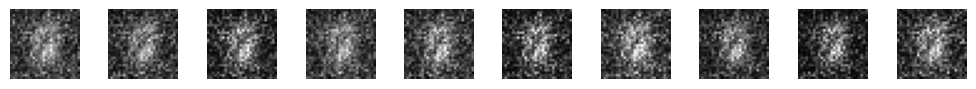

Finished epoch 375
Memory usage: 84.4%
Starting epoch 376
Epoch 376/400 | D Loss: 0.4454 | G Loss: 0.4454
Finished epoch 376
Memory usage: 84.4%
Starting epoch 377
Epoch 377/400 | D Loss: 0.4411 | G Loss: 0.4411
Finished epoch 377
Memory usage: 84.8%
Starting epoch 378
Epoch 378/400 | D Loss: 0.4387 | G Loss: 0.4387
Finished epoch 378
Memory usage: 84.6%
Starting epoch 379
Epoch 379/400 | D Loss: 0.4333 | G Loss: 0.4333
Finished epoch 379
Memory usage: 84.5%
Starting epoch 380
Epoch 380/400 | D Loss: 0.4293 | G Loss: 0.4293
Finished epoch 380
Memory usage: 84.7%
Starting epoch 381
Epoch 381/400 | D Loss: 0.4265 | G Loss: 0.4265
Finished epoch 381
Memory usage: 84.5%
Starting epoch 382
Epoch 382/400 | D Loss: 0.4284 | G Loss: 0.4284
Finished epoch 382
Memory usage: 84.6%
Starting epoch 383
Epoch 383/400 | D Loss: 0.4324 | G Loss: 0.4324
Finished epoch 383
Memory usage: 84.5%
Starting epoch 384
Epoch 384/400 | D Loss: 0.4288 | G Loss: 0.4288
Finished epoch 384
Memory usage: 85.1%
Startin

In [15]:
# Function to load models if they exist
def load_saved_models(generator_path, discriminator_path, input_dimension):
    if os.path.exists(generator_path) and os.path.exists(discriminator_path):
        generator = load_model(generator_path)
        discriminator = load_model(discriminator_path)
        print(f"Loaded saved models from {generator_path} and {discriminator_path}")
    else:
        generator = build_generator(input_dimension, 28*28)
        discriminator = build_discriminator(28*28)
        print("No saved models found, building new models")
    return generator, discriminator

# Main training loop
def main():
    # Hyperparameters
    input_dimension = 100
    batch_size = 4  # Reduced batch size
    epochs = 400
    plot_interval = 25
    learning_rate = 0.0002
    beta_1 = 0.5

    # Load and preprocess data
    x_train = preprocess_mnist_data()

    # Load or build models
    generator_path = 'generator_epoch_350.h5'
    discriminator_path = 'discriminator_epoch_350.h5'
    generator, discriminator = load_saved_models(generator_path, discriminator_path, input_dimension)
    gan = build_gan(generator, discriminator, input_dimension)

    # Create separate optimizer instances for each model
    discriminator_optimizer = Adam(learning_rate=learning_rate, beta_1=beta_1)
    gan_optimizer = Adam(learning_rate=learning_rate, beta_1=beta_1)

    # Compile models with their respective optimizers
    discriminator.compile(
        optimizer=discriminator_optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    gan.compile(
        optimizer=gan_optimizer,
        loss='binary_crossentropy'
    )

    # Determine starting epoch
    start_epoch = 351  # Assuming you want to start from epoch 151

    # Training loop
    for epoch in range(start_epoch, epochs):
        print(f'Starting epoch {epoch}')
        d_loss, g_loss = train_gan(generator, discriminator, gan, x_train, input_dimension, batch_size)
        print(f'Epoch {epoch}/{epochs} | D Loss: {d_loss:.4f} | G Loss: {g_loss:.4f}')
        
        if epoch % plot_interval == 0:
            plot_generated_images(epoch, generator, input_dimension)
        
        gc.collect()
        print(f'Finished epoch {epoch}')
        print(f'Memory usage: {psutil.virtual_memory().percent}%')

        # Save model checkpoints
        if epoch % plot_interval == 0:
            generator.save(f'generator_epoch_{epoch}.h5')
            discriminator.save(f'discriminator_epoch_{epoch}.h5')

if __name__ == "__main__":
    main()

## Results

Results started decreasing quality after around epoch 125:<br>
Not all images showed above because kernell kept crashing so I had to save checkpoints and keep restarting program<br>
It seems the model has recognized the geral shape for the digits at the center of the image but wasnt able to generate anyhting more clear than that<br>
Try? CHANGING PARAMETERS, DIFFERENT OPTIMIZERS, DIFFERENT LAYESR TO MODELS? <br>
Best result achieved : <br>

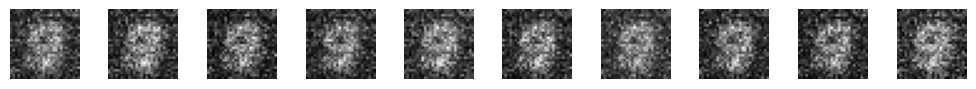

## References
https://kaushiklade27.medium.com/image-generation-using-generative-adversarial-networks-gans-cd82afd71597